In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math
import warnings

from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

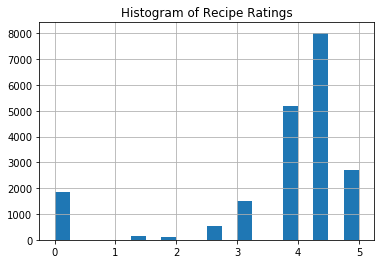

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

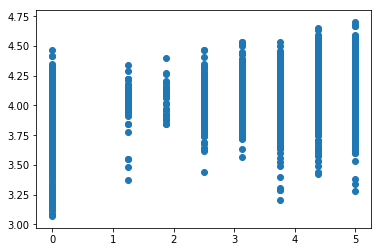

In [8]:
plt.scatter(Y, svr.predict(X))

In [9]:
svr.score(X, Y)

-0.003978314483867873

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

In [11]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
raw_data['Rates'] = np.where(raw_data['rating']>=3, 1, 0)

In [24]:
raw_data['Rates'].value_counts()

1    17396
0     2656
Name: Rates, dtype: int64

In [13]:
print(raw_data['Rates'].groupby(raw_data['rating']).describe())

         count  mean  std  min  25%  50%  75%  max
rating                                            
0.000   1836.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1.250    164.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1.875    124.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2.500    532.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3.125   1489.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
3.750   5169.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
4.375   8019.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
5.000   2719.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0


In [14]:
raw_data.drop(['calories', 'protein', 'fat', 'sodium'], 1, inplace=True)

In [15]:
raw_data.drop(['title', 'yonkers'], 1, inplace=True)

In [16]:
print("Data Frame")
print(raw_data)
print()

print("Correlation Matrix")
print(raw_data.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(raw_data, 3))

Data Frame
       rating  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0       2.500        0.0         0.0              0.0                   0.0   
1       4.375        0.0         0.0              0.0                   0.0   
2       3.750        0.0         0.0              0.0                   0.0   
3       5.000        0.0         0.0              0.0                   0.0   
4       3.125        0.0         0.0              0.0                   0.0   
5       4.375        0.0         0.0              0.0                   0.0   
6       4.375        0.0         0.0              0.0                   0.0   
7       3.750        0.0         0.0              0.0                   0.0   
8       4.375        0.0         0.0              0.0                   0.0   
9       3.750        0.0         0.0              0.0                   0.0   
10      3.750        0.0         0.0              0.0                   0.0   
11      4.375        0.0         0.0     

                         rating  #cakeweek  #wasteless  22-minute meals  \
rating                 1.000000   0.003147    0.006771         0.011155   
#cakeweek              0.003147   1.000000   -0.000122        -0.000504   
#wasteless             0.006771  -0.000122    1.000000        -0.000206   
22-minute meals        0.011155  -0.000504   -0.000206         1.000000   
3-ingredient recipes  -0.047840  -0.000635   -0.000259        -0.001070   
30 days of groceries   0.006717  -0.000323   -0.000132         0.091180   
advance prep required -0.027128  -0.001279   -0.000522        -0.002154   
alabama               -0.009179  -0.000212   -0.000086        -0.000356   
alaska                 0.000265  -0.000173   -0.000071        -0.000291   
alcoholic             -0.224767  -0.003606   -0.001472        -0.006072   
almond                 0.007631   0.014151   -0.001223        -0.005045   
amaretto               0.012250   0.064682   -0.000312        -0.001286   
anchovy               -0.

england      london      1.000000
peanut free  soy free    0.940721
rating       Rates       0.888553
dtype: float64


In [17]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(raw_data, 100))

Top Absolute Correlations
england                  london               1.000000
peanut free              soy free             0.940721
rating                   Rates                0.888553
kosher                   pescatarian          0.871690
alcoholic                drink                0.851944
peanut free              tree nut free        0.829673
oregon                   portland             0.829149
kentucky                 louisville           0.816476
soy free                 tree nut free        0.797465
snack                    snack week           0.780163
peanut free              pescatarian          0.737887
kosher                   peanut free          0.734778
pescatarian              soy free             0.734679
kosher                   soy free             0.726753
pescatarian              vegetarian           0.725969
kosher                   vegetarian           0.720537
breakfast                brunch               0.712295
caviar                   potato salad  

In [18]:
raw_data.drop(['england', 'london', 'oregon', 'portland', 'kentucky', 'louisville', 'tree nut free', 'snack week','new orleans',
              'illinois', 'kitchen olympics', 'missouri', 'st. louis'], 1, inplace=True)

In [30]:
corr_df_filter = pd.DataFrame(get_top_abs_correlations(raw_data, 150))

In [31]:
corr_df_filter.head()

,,0
peanut free,soy free,0.940721
rating,Rates,0.888553
kosher,pescatarian,0.871690
alcoholic,drink,0.851944
peanut free,pescatarian,0.737887


In [32]:
corr_df_filter = corr_df_filter.reset_index()

In [33]:
corr_df_filter.columns = ['var1','var2', 'corr']

In [34]:
corr_df_filter.head()

,var1,var2,corr
0,peanut free,soy free,0.940721
1,rating,Rates,0.888553
2,kosher,pescatarian,0.871690
3,alcoholic,drink,0.851944
4,peanut free,pescatarian,0.737887


In [35]:
target_correlations = corr_df_filter[corr_df_filter['var1'] == 'Rates']

In [36]:
print(target_correlations)

Empty DataFrame
Columns: [var1, var2, corr]
Index: []


In [25]:
X = raw_data.drop(['rating','Rates'], 1)
Y = raw_data['Rates']            

In [26]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
svm.score(X, Y)

0.8793636544983044

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X, Y, cv=5)

array([0.87337986, 0.87855362, 0.87680798, 0.87930175, 0.87830424])